# Machine Learning Classification Model

## Load the data

In [244]:
import pandas as pd

df = pd.read_excel('data/Microsoft_LinkedIn_Processed.xlsx', parse_dates=['Date'], index_col=0)
df

,Open,High,Low,Close,Volume,change_tomorrow,change_tomorrow_direction
Date,,,,,,,
2016-12-08,61.299999,61.580002,60.840000,61.009998,21220800,1.549141,UP
2016-12-09,61.180000,61.990002,61.130001,61.970001,27349400,0.321694,UP
2016-12-12,61.820000,62.299999,61.720001,62.169998,20198100,1.286125,UP
2016-12-13,62.500000,63.419998,62.240002,62.980000,35718900,-0.478620,DOWN
2016-12-14,63.000000,63.450001,62.529999,62.680000,30352700,-0.159793,DOWN
...,...,...,...,...,...,...,...
2023-05-19,316.739990,318.750000,316.369995,318.339996,27529500,0.884238,UP
2023-05-22,318.600006,322.589996,318.010010,321.179993,24115700,-1.877810,DOWN
2023-05-23,320.029999,322.720001,315.250000,315.260010,30797200,-0.449260,DOWN


## Machine Learning Model

### Separate the data

1. Target: which variable do you want to predict?
2. Explanatory: which variables will you use to calculate the prediction?

In [245]:
target = df.change_tomorrow_direction

In [246]:
explanatory = df.drop(columns=['change_tomorrow_direction', 'change_tomorrow'])

In [247]:
explanatory.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2023-05-19,316.739990,318.750000,316.369995,318.339996,27529500
2023-05-22,318.600006,322.589996,318.010010,321.179993,24115700
2023-05-23,320.029999,322.720001,315.250000,315.260010,30797200
2023-05-24,314.730011,316.500000,312.609985,313.850006,23384900
2023-05-25,323.239990,326.899994,320.000000,325.920013,43301700


### Compute the model

The following Python code will compute the numbers of the mathematical equation that we will use to calculate if the ticker goes UP or DOWN.

In [248]:
from sklearn.tree import DecisionTreeClassifier

In [249]:
model_dt = DecisionTreeClassifier(max_depth=5)

In [250]:
model_dt.fit(X = explanatory, y = target)

DecisionTreeClassifier(max_depth=5)

### Visualize the model

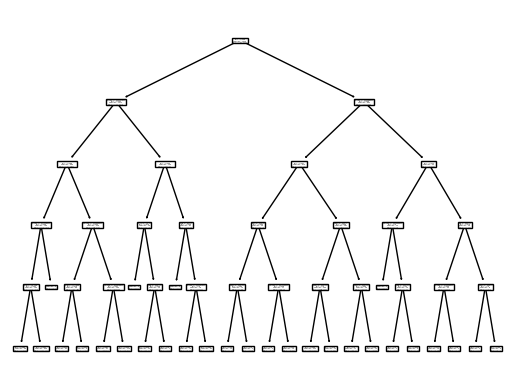

In [251]:
from sklearn.tree import plot_tree

plot_tree(decision_tree=model_dt, feature_names=model_dt.feature_names_in_);

### Calculate the predictions

In [252]:
y_pred = model_dt.predict(X=explanatory)

In [253]:
df_predictions = df[['change_tomorrow_direction']].copy()
df_predictions['prediction'] = y_pred
df_predictions

,change_tomorrow_direction,prediction
Date,,
2016-12-08,UP,DOWN
2016-12-09,UP,DOWN
2016-12-12,UP,DOWN
2016-12-13,DOWN,UP
2016-12-14,DOWN,DOWN
...,...,...
2023-05-19,UP,DOWN
2023-05-22,DOWN,DOWN
2023-05-23,DOWN,DOWN


### Evaluate the model: compare predictions with the reality

In [254]:
comp = df_predictions.change_tomorrow_direction == df_predictions.prediction

In [255]:
comp.sum()

976

In [256]:
comp.sum()/len(comp)

0.6002460024600246

In [257]:
model_dt.score(X=explanatory, y=target)

0.6002460024600246

## Save the model into a file

- We'll write the numbers of the Decision Tree's mathematical equation into a file.

In [258]:
import pickle
import os

In [259]:
model_dt

DecisionTreeClassifier(max_depth=5)

In [260]:
with open('models/model_dt_classification.pkl', 'wb') as f:
    pickle.dump(model_dt, f)